<a href="https://colab.research.google.com/github/gtzan/csc349A_tzanetakis/blob/main/notebooks/csc349A_numerical_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numerical Integration (Quadrature)

**Quadrature** - The process of determining areas e.g. area of a circle by inscribed and superscribed polygons. This term is used to avoid confusion with
the numeric integration of differential equations.

Functions to be integrated or differentiated will typically be in one of three forms:

1. A simple continuous function - polynomial, exponential, trigonometric, etc.
2. A complicated continuous function that is difficult or impossible to differentiate/integrate analytically.
3. A tabulated, discrete function where we have a set of points $(x_i,f(x_i))$ - for example, sample data.

We use numerical methods in all these cases. For 3, it is the only option. For 2, it may be the only choice or the most efficient choice. For 1, it is often the most efficient and simplest option.

**Problem:** approximate the value of
$$
\int_a^{b} f(x) dx
$$
where $f(x)$ is such that it cannot be integrated analytically or it is known at only a finite set of points.

**Procedure:** approximate $f(x)$ by an interpolating polynomial $P(x)$, and approximate $\int_{a}^{b} f(x)dx$ by $\int_a^{b} P(x)dx$

Suppose $P_n(x)$ is the Lagrange form of the interpolating polynomial:
$$
P_n(x) = \sum_{i=0}^{n} L_i(x) f(x_i)
$$
then
$$
\int_{a}^{b} f(x)dx \approx \int_{a}^{b} \left [ \sum_{i=0}^{n} L_i(x) f(x_i) \right ] dx = \sum_{i=0}^{n} \left[ \int_a^b L_i(x) dx \right ] f(x_i)
$$
which is of the form $\sum_{i=0}^{n} a_i f(x_i)$.

Such an approximation is called a {\bf quadrature formula}, and $a_i$ are the {\bf quadrature coefficients} and $x_i$ are the **quadrature points**, the points at which $f(x)$ is sampled to approximate $\int_{a}^{b} f(x)dx$.

Types of quadrature formulas:
1. Newton-Cotes closed - Sections 21.1 to 21.3 of the text.
2. Newton-Cotes open - Section 21.4.
3. Gaussian (omit) - In the text but we won't do.

Any quadrature formula derived by integrating an interpolating polynomial at equally-spaced quadrature points is called a **Newton-Cotes** formula.

**Gaussian formulas**
 obtain high accuracy by using optimally-chosen, unequally-spaced quadrature points.



## Newton-Cotes closed formulas

For any $n \geq 1$, subdivide [a,b] into $n$ subintervals of length
$h = \frac{b-a}{n}$.


Thus
$$
\begin{align*}
x_{i+1} - x_{i} = h \\
x_i = x_0 + ih
\end{align*}
$$

If $P_n(x)$ interpolates $f(x)$ at $a=x_0, x_1, x_2, \dots, b=x_n$
and
$$
\int_{a}^{b} f(x)dx \approx \int_{a}^{b} P_n(x)dx
$$
then the resulting quadrature formula is called a **Newton-Cotes** closed formula.


## Newton-Cotes closed quadrature formulas - n=1

The case $n=1$:

Here $h = b -a$. The (linear) interpolating polynomial is:
$$
P(x) = \frac{x-x_1}{x_0-x_1}f(x_0) + \frac{x-x_0}{x_1-x_0} f(x_1)
$$

The quadrature formula for approximating $\int_a^{b} f(x)dx$ is obtained by integrating P(x):

$$
\begin{align*}
\int_{a}^{b} f(x)dx &\approx \int_{x_0}^{x_1} P(x)dx \\
   &= \left [ \int_{x_0}^{x_1} \frac{x-x_1}{x_0-x_1}f(x_0)dx \right ] + \left[ \int_{x_0}^{x_1} \frac{x-x_0}{x_1-x_0}f(x_1)dx \right ] \\
   &= \frac{f(x_0)}{x_0-x_1} \left [ \frac{x^2}{2} - x_1x \right ]_{x_0}^{x_1} + \frac{f(x_1)}{x_1-x_0} \left [ \frac{x^2}{2} - x_0x \right ]_{x_0}^{x_1} \\
   &= \frac{f(x_0)}{x_0-x_1} \left [ (\frac{x_1^2}{2} - x_1^2)- (\frac{x_0^2}{2} - x_1x_0)\right ] + \frac{f(x_1)}{x_1-x_0} \left [ (\frac{x_1^2}{2} - x_1x_0)- (\frac{x_0^2}{2} - x_0^2) \right ] \\
   &= \frac{f(x_0)}{x_0-x_1} \left [ -(\frac{x_1^2}{2} - x_1x_0 + \frac{x_0^2}{2}) \right ] + \frac{f(x_1)}{x_1-x_0} \left [ \frac{x_1^2}{2} - x_1x_0 + \frac{x_0^2}{2} \right ] \\
   &= \frac{f(x_0)}{2}\left [\frac{(x_1-x_0)^2}{(x_1-x_0)}\right ]+\frac{f(x_1)}{2}\left [\frac{(x_1-x_0)^2}{(x_1-x_0)}\right ] \\
   &= \frac{x_1 - x_0}{2}f(x_0) + \frac{x_1 - x_0}{2}f(x_1) \\
   &= \frac{h}{2} [f(x_0) + f(x_1)], \mbox{ since } h= x_1-x_0  
\end{align*}
$$

This is the **trapezoid rule**. Its error term can be obtained by integrating the error term of the Lagrange form of the interpolating polynomial, which for $n=1$ is
$$
f(x) - P(x) = \frac{f''(\xi)}{2}(x-x_0)(x-x_1)
$$
where $\xi$ is in the interval $[a,b]$.
Integrating this gives:

$$
\begin{align*}
\int_a^{b} f(x) dx - \int_{x_0}^{x_1} P(x)dx &= \int_a^{b} f(x) dx - \frac{h}{2} [ f(x_0) - f(x_1)] \\
&= \int_{a}^{b} \frac{f''(\xi)}{2}(x-x_0)(x-x_1)dx  \\
&= \frac{f''(\xi)}{2} \int_{a}^{b} (x-x_0)(x-x_1)dx \\
\end{align*}
$$
since $f''(\xi)$ is a constant. Now, let $t = \frac{x-x_0}{h}$, then $dx=hdt$, $x - x_0 = th$, and $x - x_1 = (t-1) h$.
Also, when $x=x_0$ then $t = 0$ and when $x = x_1$, then $t=1$. Thus, we now have

$$
\begin{align*}
\int_a^{b} f(x) dx - \int_{x_0}^{x_1} P(x)dx &= \frac{f''(\xi)}{2}\int_{0}^{1} h^2t(t-1)(hdt) \\
&= h^3 \frac{f''(\xi)}{2} \int_0^{1} t(t-1)dt \\
&= - \frac{h^3}{12}f''(\xi)
\end{align*}
$$
for some value $\xi$ between $a$ and  $b$. This error term is the **truncation error** when $\int_a^b f(x) dx$ is approximated by $\int_a^{b} P(x)dx$.


## Example 1

Use the Trapezoidal Rule to numerically integrate $f(x)=0.2+25x-200x^2+675x^3-900x^4+400x^5$ from $a=0$ to $b=0.8$. \\

**Solution:**
First, we need $f(0)$ and $f(0.8)$.

$$
f(0)=0.2
$$
$$
f(0.8)=0.2+25(0.8)-200(0.8)^2+675(0.8)^3-900(0.8)^4+400(0.8)^5 = 0.232
$$

So,

$$
\int_0^{0.8}f(x)dx \approx \frac{h}{2}[f(x_0)+f(x_1)] = \frac{0.8-0}{2}[f(0)+f(0.8)] = 0.1728
$$

The actual value is $\int_0^{0.8}f(x)dx=1.640533$. That means that the true absolute error is $|E_t|=|1.640533-0.1728|=1.467733$. To see why this error is so big I plotted the function and the polynomial together.


In [7]:
def orig(x):
  return 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5

orig(0)
orig(0.8)
orig(0.6)

def trapezoid(x0, x1):
  return (x1-x0)/2*(orig(x0)+orig(x1))

trapezoid(0,0.6)

1.0991999999999933

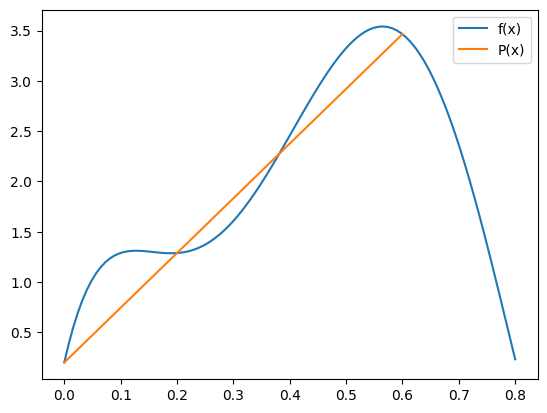

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 0.8, 100)
fx=0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5;
plt.plot(x,fx)
x = [0,0.6]
px = [0.2, 3.46439]
plt.plot(x,px)
plt.legend(['f(x)','P(x)'])
plt.show()




## Newton-Cotes closed quadrature formulas - n=2

For the case $n=2$ the quadratic interpolating polynomial is:

$$
P(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0)
+ \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1)
+ \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)
$$

As in the case $n=1$, the quadrature formula for approximating $\int_a^{b} f(x)dx$ is obtained by integrating $P(x): \int_{a}^{b}f(x)dx \approx \int_{x_0}^{x_2}P(x)dx$.

This gives:
$$
   \int_{a}^{b} f(x)dx \approx \frac{h}{3}(f(x_0) + 4 f(x_1) + f(x_2))
$$
where now $h=\frac{b-a}{2}$. This is called **Simpson's rule** or **Simpson's 1/3 rule**, and its **truncation error** is given by:
$$
\int_{a}^{b}f(x)dx - \int_{x_0}^{x_2} P(x)dx = -\frac{h^5}{90} f^{(4)}(\xi), \mbox { for some } \xi \in [a,b]
$$


## Example 2

Use the 1/3 Simpson's Rule to numerically integrate $f(x)=0.2+25x-200x^2+675x^3-900x^4+400x^5$ from $a=0$ to $b=0.8$. \\

**Solution:**
First, we need $f(0)$, $f(0.4)$ and $f(0.8)$ with $h=\frac{b-a}{2}=\frac{0.8}{2}=0.4$.

$$
f(0)=0.2
$$
$$
f(0.4)=0.2+25(0.4)-200(0.4)^2+675(0.4)^3-900(0.4)^4+400(0.4)^5 = 2.456
$$
$$
f(0.8)=0.2+25(0.8)-200(0.8)^2+675(0.8)^3-900(0.8)^4+400(0.8)^5 = 0.232
$$

So,

$$
\int_0^{0.8}f(x)dx \approx \frac{h}{3}[f(x_0)+4f(x_1)+f(x_2)] = \frac{0.4}{3}[0.2+4(2.456)+0.232] = 1.367467
$$

The actual value is $\int_0^{0.8}f(x)dx=1.640533$. That means that the true absolute error is $|E_t|=|1.640533-1.367467|=0.2730667$.


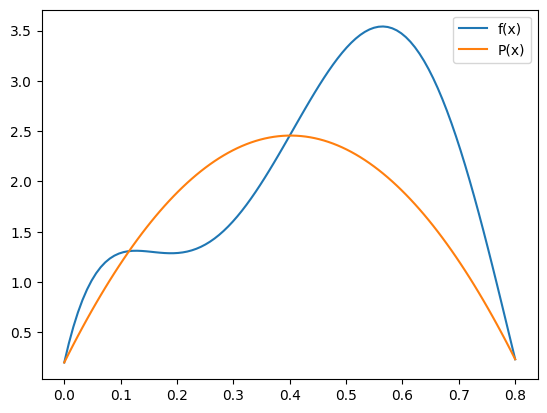

In [10]:
x = np.linspace(0, 0.8, 100)
fx=0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5
Px = 0.2 + 11.24*x - 14*x**2
plt.plot(x,fx)
plt.plot(x,Px)
plt.legend(['f(x)','P(x)'])
plt.show()


## Quadrature formula for n=3

The Newton-Cotes closed quadrature formula for $n=3$, in which $f(x)$
is approximated by a cubic polynomial that interpolates at four
equally-spaced points, is:
$$
\int_{a}^{b} f(x)dx \approx \frac{3h}{8} (f(x_0) + 3 f(x_1) + 3 f(x_2) + f(x_3)),
\mbox { where } h = \frac{b-a}{3}
$$

The truncation error for this is
$$
E_t=\frac{-3}{80}h^5f^{(4)}(\xi)
$$
for some $\xi \in [a,b]$.

## Example 3

Use the 3/8 Simpson's Rule to numerically integrate $f(x)=0.2+25x-200x^2+675x^3-900x^4+400x^5$ from $a=0$ to $b=0.8$.

**Solution:**
First, we need $f(0)$, $f(0.8/3)$, $f(1.6/3)$ and $f(0.8)$ with $h=\frac{b-a}{2}=\frac{0.8}{3}$.

$$
\begin{align*}
&f(0)=0.2 \\
&f(0.8/3)=0.2+25(0.8/3)-200(0.8/3)^2+675(0.8/3)^3-900(0.8/3)^4+400(0.8/3)^5 = 1.432724 \\
&f(1.6/3)=0.2+25(01.6/3)-200(1.6/3)^2+675(1.6/3)^3-900(1.6/3)^4+400(1.6/3)^5 = 3.487177 \\
&f(0.8)=0.2+25(0.8)-200(0.8)^2+675(0.8)^3-900(0.8)^4+400(0.8)^5 = 0.232
\end{align*}
$$
So,
$$
\begin{align*}
\int_0^{0.8}f(x)dx &\approx \frac{3h}{8}[f(x_0)+3f(x_1)+3f(x_2)+f(x_3)] \\
&= \frac{3(0.8/3)}{8}[0.2+3(1.432724)+3(3.487177)+0.232] = 1.5191703
\end{align*}
$$
The actual value is $\int_0^{0.8}f(x)dx=1.640533$. That means that the true absolute error is $|E_t|=|1.640533-1.5191703|=0.1213630$.


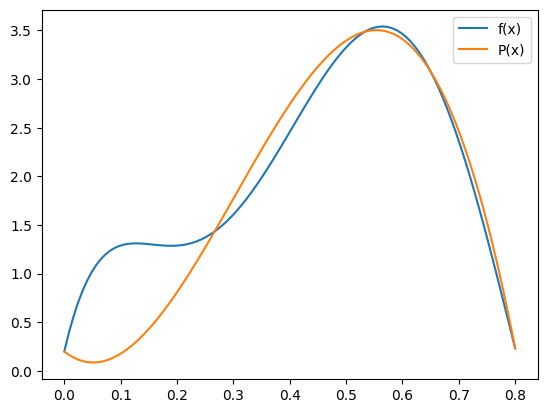

In [10]:
x = np.linspace(0, 0.8, 100)
fx=0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5
Px = 0.2 - 4.5822*x + 48.8889*x**2 - 53.8889*x ** 3;
plt.plot(x,fx)
plt.plot(x,Px)
plt.legend(['f(x)','P(x)'])
plt.show()